In [1]:
%matplotlib notebook
import sqs_nqs_tools as nqs
from sqs_nqs_tools.offline import access, adata, tof

# Plot options
import matplotlib.pyplot as plt

# Import required libraries
import numpy as np 
import pyqtgraph as pg

# Import karabo libraries
import karabo_bridge as kb
import karabo_data as kd

raw_path ='/gpfs/exfel/exp/SQS/201802/p002195/raw'



Welcome to sqs_nqs_tools version v0.1+60.gd909a98.dirty


In [2]:
def get_encoder(run):
    pos_dirspec='SQS_AQS_MOV/MOTOR/Y_DOWNSTR'
    pos_elementspec='encoderPosition.value'
    encoder = access.getData(raw_path + access.runFormat(run),pos_dirspec,pos_elementspec)
    return encoder



In [3]:
np.arange(76,80)


array([76, 77, 78, 79])

Scan and count htis for each run ... as used for entry 28 in logbook 2195, not sure how good results are

In [5]:
#runs = np.concatenate(np.arange(30,39),np.arange(40,42))
#runs = [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,76, 77, 78, 79]#
runs = [30,31,32,33,34,35,36,37,38]

integrals = list()
hit_rates = list()
run_no_x = list()
TOFavg_s = list()
goodPulseE = list()

TOF_start = 0
TOF_step = 35000
no_bunch = 8

[TOFtrace_bg, TOFrange_bg]  = adata.getTOF(28, path=raw_path, tofrange=(142000,142000+400000))

TOFavg_bg = tof.averageTOF(TOFtrace_bg)

for run_no in runs:
    print(run_no)
    [TOFtrace, TOFrange]  = adata.getTOF(run_no, path=raw_path, tofrange=(137000,137000+400000))
    pulseE = adata.getPulseEnergies( run_no , path=raw_path) 
        
    goodPulseE = (pulseE > 3500) * (pulseE < 3800)  # bool array for pulseE
    hits = np.min(TOFtrace, axis=1)<-1400  #-500 #+ 1850# bool array for hits
    hitrate = np.sum(hits*goodPulseE) / np.sum(goodPulseE) #TOFtrace.shape[0]
    TOFavg = tof.averageTOF(TOFtrace[goodPulseE,:])
    TOFavg_hit = tof.averageTOF(TOFtrace[hits*goodPulseE,:])
    TOFavg_s.append(TOFavg_hit)
    hit_rates.append(hitrate)
    integrals.append(np.sum(TOFavg))
    run_no_x.append(run_no)

30
BE WARY OF THIS FUNCTION!!!! Might not return true PE depending on train settings.
31
BE WARY OF THIS FUNCTION!!!! Might not return true PE depending on train settings.
32
BE WARY OF THIS FUNCTION!!!! Might not return true PE depending on train settings.
33
BE WARY OF THIS FUNCTION!!!! Might not return true PE depending on train settings.
34
BE WARY OF THIS FUNCTION!!!! Might not return true PE depending on train settings.
35
BE WARY OF THIS FUNCTION!!!! Might not return true PE depending on train settings.
36
BE WARY OF THIS FUNCTION!!!! Might not return true PE depending on train settings.
37
BE WARY OF THIS FUNCTION!!!! Might not return true PE depending on train settings.
38
BE WARY OF THIS FUNCTION!!!! Might not return true PE depending on train settings.


<IPython.core.display.Javascript object>


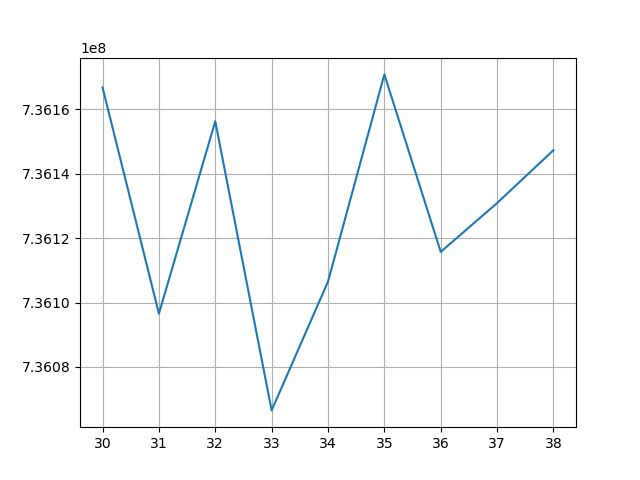

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


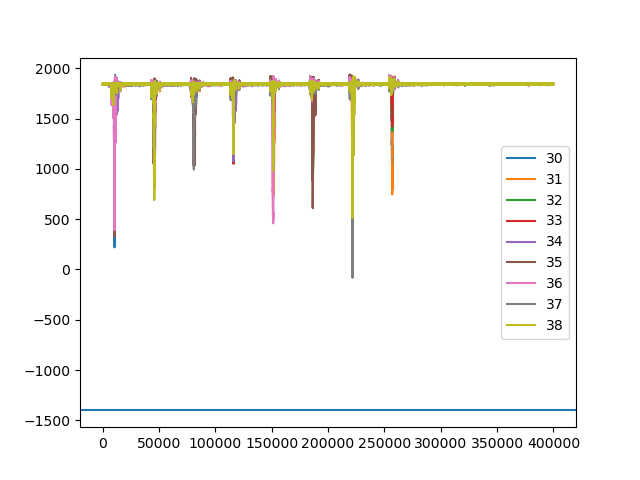

In [7]:
plt.figure(1)
plt.plot(run_no_x,integrals)
plt.grid()
plt.show()
plt.figure(2)
plt.plot(run_no_x,hit_rates)
plt.title("hitrate")
plt.grid()
plt.show()
plt.figure(3)
for r in range(len(runs)):
    plt.plot(TOFavg_s[r], label=str(runs[r]))
plt.axhline(-1400)
plt.legend()
plt.show()

now do it with look at each bunch seperately

In [1]:
%matplotlib notebook
import sqs_nqs_tools as nqs
from sqs_nqs_tools.offline import access, adata, tof

# Plot options
import matplotlib.pyplot as plt

# Import required libraries
import numpy as np 
import pyqtgraph as pg

# Import karabo libraries
import karabo_bridge as kb
import karabo_data as kd

raw_path ='/gpfs/exfel/exp/SQS/201802/p002195/raw'

Welcome to sqs_nqs_tools version v0.1+60.gd909a98.dirty


In [35]:
#runs = np.concatenate(np.arange(30,39),np.arange(40,42))
runs = [30,31,32,33,34,35,36,37,38]
#runs = [80,81,82]

integrals = list()
hit_rates = list()
hit_traces = list()
good_shots = list()
run_no_x = list()
TOFavg_s = list()
goodPulseE = list()

TOF_start = 0
TOF_step = 35000
no_bunch = 8

[TOFtrace_bg, TOFrange_bg]  = adata.getTOF(28, path=raw_path, tofrange=(142000,142000+400000))

TOFavg_bg = tof.averageTOF(TOFtrace_bg)

def get_goodPulseE(pulseE):
    return np.ones_like(pulseE)
    return (pulseE > 3500) * (pulseE < 3800)

def get_hits(tof_traces):
    return np.min(tof_traces, axis=1)<-1400

def get_hit_traces(hits,toftraces):
    return toftraces[hits,:]
    
def get_hitrate(hits,goodPulseE):
    return np.sum(hits*goodPulseE) / np.sum(goodPulseE)

def hitrate_singlebunch(tof_traces,pulseE):
    goodPulseE = get_goodPulseE(pulseE)
    hits = get_hits(tof_traces)
    hitrate = get_hitrate(hits,goodPulseE)
    print(hits * goodPulseE)
    hittraces = get_hit_traces(hits * goodPulseE,tof_traces)
    return hitrate, np.sum(goodPulseE), hittraces

for run_no in runs:
    print(run_no)
    [TOFtrace, TOFrange]  = adata.getTOF(run_no, path=raw_path, tofrange=(137000,137000+400000))
    pulseE = adata.getPulseEnergies( run_no , path=raw_path) 
    pulseE = pulseE[:,:no_bunch]
    split_TOF = np.zeros((TOFtrace.shape[0],TOF_step,no_bunch))
    run_hit_rates = list()
    run_good_shots = list()
    run_hittraces = list()
    for i in range(no_bunch):
        split_TOF[:,:,i] = TOFtrace[:,(TOF_start + i*TOF_step):(TOF_start + (i+1)*TOF_step)]
        current_hitrate, current_good_shots,current_hittraces = hitrate_singlebunch(split_TOF[:,:,i],pulseE[:,i])
        run_hit_rates.append(current_hitrate)
        run_good_shots.append(current_good_shots)
        run_hittraces.append(current_hittraces)
    
    hit_rates.append(run_hit_rates)
    good_shots.append(run_good_shots)
    hit_traces.append(run_hittraces)
    run_no_x.append(run_no)

30
BE WARY OF THIS FUNCTION!!!! Might not return true PE depending on train settings.
(630,)


IndexError: arrays used as indices must be of integer (or boolean) type

In [23]:
stitched_hit_rates = list()
stiched_run_no = list()
for i in range(len(hit_rates)):
    stiched_run_no.append(run_no_x[i])
    r_hitrates = np.array(hit_rates[i])
    r_goodsh = np.array(good_shots[i])
    stitched_hit_rates.append(np.sum(r_hitrates*r_goodsh)/np.sum(r_goodsh))
    print("RUN "+str(run_no_x[i])+" Hits : " + str(np.sum(r_hitrates*r_goodsh)) + " / good pulses: " + str(np.sum(r_goodsh)))
    

RUN 30 Hits : 15.0 / good pulses: 5040.0
RUN 31 Hits : 24.0 / good pulses: 5152.0
RUN 32 Hits : 18.0 / good pulses: 4848.0
RUN 33 Hits : 22.0 / good pulses: 5848.0
RUN 34 Hits : 34.0 / good pulses: 9208.0
RUN 35 Hits : 19.0 / good pulses: 4856.0
RUN 36 Hits : 13.0 / good pulses: 5048.0
RUN 37 Hits : 17.0 / good pulses: 5016.0
RUN 38 Hits : 24.0 / good pulses: 6696.0


<IPython.core.display.Javascript object>


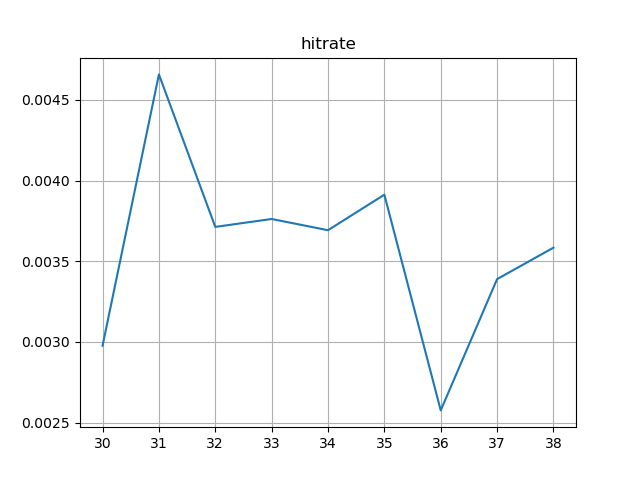

In [24]:
plt.plot(stiched_run_no,stitched_hit_rates)
plt.title("hitrate")
plt.grid()
plt.show()

In [26]:
hits*goodPulseE

NameError: name 'hits' is not defined

<hr>

In [ ]:
[TOFtrace, TOFrange]  = adata.getTOF(run_no, path=raw_path, tofrange=(142000,142000+400000))


In [ ]:
TOFtrace.shape



In [ ]:
TOFavg = tof.averageTOF(TOFtrace)


In [ ]:
summm = np.sum(TOFavg)


In [ ]:
summm

In [ ]:
tof.plotTOF(TOFrange, TOFavg)

In [ ]:
[TOFtrace, TOFrange]  = adata.getTOF(80, path=raw_path, tofrange=(137000,137000+400000))

In [ ]:
plt.grid()
plt.axhline(1000)
plt.axhline(-2000)
plt.xlim((215000,235000))
tof.plotTOF(TOFrange, TOFtrace.sel(trainId=124345964))

plt.figure(2)
plt.grid()
plt.axhline(1000)
plt.axhline(-2000)
tof.plotTOF(TOFrange, TOFtrace.sel(trainId=124345964))

In [ ]:
bool_sat=(np.min(TOFtrace,axis=1)<-2000)
print(bool_sat.shape)

print("sat :" + str(np.sum(bool_sat)))

np.sum((np.min(TOFtrace,axis=1)<1000))
      
      